_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösung zu Übung 05 - Archäologie: Daten finden, einlesen und mit Histogrammen visualisieren
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
 Mit dieser Übung beginnen wir eine Fallstudie, die sich mit einem Datensatz aus der Archäologie beschäftigt: dem ["Inventory of Crafts and Trade in the Roman East - database of tableware" (ICRATES)](https://archaeologydataservice.ac.uk/archives/view/icrates_lt_2018/downloads.cfm). Außerdem werden wir uns damit beschäftigen, wie wir die gewonnenen Informationen am besten visualisieren können. Die aktuelle Übung gliedert sich in drei Teile:
* [Daten beschaffen](#daten_beschaffen)
* [Daten erkunden & bereinigen](#daten_erkunden)
* [Histogramme](#histogramme)  

Für die folgenden Übungen gibt es kein Lehrvideo. Deswegen wird es in den Jupyter-Notebooks zu den Übungen mehr Erklärungen und Zwischenschritte geben. Darüber hinaus haben ab dieser Woche auch nicht mehr alle Übungen der verschiedenen Übungsgruppen den exakt gleichen Inhalt, da einige Themenbereiche etwas unterschiedliche Werkzeuge brauchen als andere. Das Konzept ist aber überall das gleiche.

<a name="daten_beschaffen"></a>1. Daten beschaffen
---
**A.** Mache dich mit der Datenquelle und ihrem Aufbau vertraut: Wer hat die Daten gesammelt und in welchem Kontext publiziert? Was für Informationen finden sich im ```ICRATES_CATALOGUE``` und wie sind sie mit den anderen Tabellen wie ```ICRATES_LOCATION``` verknüpft?  

Wir können den Datensatz direkt aus dem Internet herunterladen:

In [1]:
# Bibliotheken zum Laden von Daten aus dem Internet
import requests 
import io

# die URL unter der der Datensatz zu finden ist
pfad_database = "https://archaeologydataservice.ac.uk/catalogue/adsdata/arch-3268-1/dissemination/csv/"

In [2]:

# lies die Information von der in der URL hinterlegten Website aus
# Der Dateiname der'ICRATES_METADATA.csv' liegt im Ordner 'documentation' (Steht in der URL ganz am Ende)

antwort_metadata = requests.get(pfad_database + 'documentation/'+'ICRATES_METADATA.csv').content

# Ein kurzer Blick in die Metadata Datei gibt uns an, wann und wie der gesamte Datensatz publiziert wurde
# und wie verschiedenen Dateien miteinander Verknuepft sind:
# diesmal geben wir das encoding schon an dieser Stelle an

print(antwort_metadata.decode('ISO-8859-1'))

File Name,Description,Creation date,Software used,Software version,Entity relationship diagram file name (this should be enclosed separately),Supporting documentation file name (this should be enclosed separately),,
ICRATES_CATALOGUE.csv,ICRATES catalogue table: Information about each sherd of tableware included in the database.,07-Jun-18,MS Excel for Mac,15.21.1,ICRATES_ER.png,ICRATES_METADATA.xlsx,,
ICRATES_LOCATION.csv,ICRATES location table: Information about each site for which tableware is included in the CATALOGUE table,07-Jun-18,MS Excel for Mac,15.21.1,ICRATES_ER.png,ICRATES_METADATA.xlsx,,
ICRATES_PUBLICATION.csv,ICRATES publication table: Information about each publication from which published tableware evidence was recorded in the CATALOGUE table,07-Jun-18,MS Excel for Mac,15.21.1,ICRATES_ER.png,ICRATES_METADATA.xlsx,,
ICRATES_DEPOSIT.csv,ICRATES deposit table: Information about each archaeological deposit in which tableware included in the CATALOGUE table was found.,07-Jun

In [3]:
# Der Dateiname der wichtigsten (und groessten) Datei, des Katalogs:
name_catalogue = "ICRATES_CATALOGUE.csv"
antwort_catalogue = requests.get(pfad_database + name_catalogue).content
inhalt_catalogue = io.StringIO(antwort_catalogue.decode('ISO-8859-1'))

In [4]:
# lade die Daten in ein DataFrame und zeige die ersten paar Zeilen an
import pandas as pd
catalogue = pd.read_csv(inhalt_catalogue)
catalogue.head()

/anaconda/envs/networks/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (15,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ICRATES_ID,Publication_ID,Deposit_ID,Location_ID,Location_specific,Fabric_ID,Fabric,Fabric_Uncertain,Standard_Form_ID,Standard_Form_Publication_Uncertain,...,Epigraphic_Anepigraphic,Complete,Graffito_Reading,Reading_Uncertain,Location_of_Graffito,Comment_Remarks_Graffito,Bibliographic_Reference_Parallels,Comment_Remarks,General_Shape,Function
0,1,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN
1,2,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN
2,3,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN
3,4,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN
4,5,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN


**B.** Lade auch die anderen zur Datenbasis gehörenden Tabellen wie oben (oder von Hand) herunter.  
<font color='green'>**HINWEIS:** Du kannst die Tabellen mit der funktion ```DataFrame.to_csv()``` lokal speichern (Funktionsweise siehe [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) ).</font>

In [5]:
catalogue.to_csv("data/" + name_catalogue)

In [6]:
# Namen aller anderen verfuegbaren Dateien:

name_DEPOSIT       = "ICRATES_DEPOSIT"
name_LOCATION      = "ICRATES_LOCATION"
name_LRP           = "ICRATES_LRP"
name_OCK           = "ICRATES_OCK"
name_PUBLICATION   = "ICRATES_PUBLICATION"
name_STANDARD_FORM = "ICRATES_STANDARD_FORM"

# in einer Liste:
namen = [  
   name_DEPOSIT,   
   name_LOCATION,   
   name_LRP,   
   name_OCK,   
   name_PUBLICATION,   
   name_STANDARD_FORM 
]

In [7]:
# Wir laden alle Dateien in ein 'Dictionary'
# Dictionaries sind aehnlich wie Listen, aber die Eintraege sind aufrufbar mit einem Namen
inhalte = {}

# Somit sparen wir uns das Herunterladen der Dateien einzeln:
for name in namen:
    print('Lade Datei {} herunter.'.format(name))
    antwort_tmp = requests.get(pfad_database + name+'.csv').content
    inhalt_tmp = io.StringIO(antwort_tmp.decode('ISO-8859-1'))
    inhalte[name] = pd.read_csv(inhalt_tmp)

Lade Datei ICRATES_DEPOSIT herunter.
Lade Datei ICRATES_LOCATION herunter.
Lade Datei ICRATES_LRP herunter.
Lade Datei ICRATES_OCK herunter.
Lade Datei ICRATES_PUBLICATION herunter.
Lade Datei ICRATES_STANDARD_FORM herunter.


In [8]:
# Auf die einzelnen DataFrames in 'inhalte' koennen wir ueber die 'namen' zugreifen
# Zeige die ersten 10 Einträge an
inhalte['ICRATES_DEPOSIT'][0:10]

,Deposit_ID,Deposit,Lower_Date,Upper_Date,Archaeological_Context,Urban_nature,Site_type_1,Site_type_2,Nature_Deposit,Formation_Deposit,type_deposit,Comment_Remarks
0,348,BERY04-BEY 006.12300/12237,65.0,75.0,Cistern 12300/122237.,Urban_(Semi-public),Commercial,Taberna,closed,secondary,Fill,This date is based upon the assumption that th...
1,3698,ATH_97_A 14:2_midlle fill,-100.0,-1.0,"Roman, with some residual material including: ...",Urban_(Public),Agora/Forum,Cistern,Mixed,NaN,Fill,NaN
2,3700,ATH_97_A 18:1(+)_lower fill,-275.0,-200.0,"Hellenistic fill in lowest 0.50 cm., seperated...",Urban_(Public),Agora/Forum,Cistern,closed,NaN,Fill,NaN
3,3704,ATH_97_B 12:2(+)_Drawshaft,-275.0,-200.0,System with one chamber and two drawshafts. B ...,Urban_(Public),Agora/Forum,Shaft,closed,NaN,NaN,NaN
4,3705,ATH_97_B 13:1(+)_Cistern,-300.0,-200.0,Cistern. Latest amphora handle names the Rhodi...,Urban_(Public),Agora/Forum,Cistern,closed,NaN,NaN,NaN
5,3706,ATH_97_B 13:3(+)_Drawshaft,-260.0,-200.0,Rhodian amphora handle of the term of the epon...,Urban_(Public),Agora/Forum,Cistern shaft,closed,NaN,NaN,NaN
6,3712,ATH_97_B 14:3,1.0,100.0,Dumped fill discarded in second half of 1st ce...,Urban_(Public),Agora/Forum,Cistern,Mixed,secondary,Fill,NaN
7,3727,ATH_97_B 21:25,-150.0,-100.0,Collapsed cistern chamber with Roman material ...,Urban_(Public),Agora/Forum,Cistern,Mixed,NaN,Fill,NaN
8,3737,ATH_97_C 20:3,-700.0,-1.0,Chamber with two short blind tunnels; uniform ...,Urban_(Public),Agora/Forum,Cistern,Mixed,NaN,Fill,NaN
9,3738,ATH_97_D 4:1_Layer II,0.0,100.0,Connected by tunnel to another chamber (E 5:1)...,Urban_(Public),Agora/Forum,Cistern,NaN,secondary,Dump & fill,NaN


In [9]:
# Speichern aller Datein lokal als .csv
for name, inhalt in inhalte.items():
    inhalt.to_csv("data/" + name+'.csv')

In [10]:
# So koennen wir die Dateien auch ohne Internetverbindung laden:
inhalte = {name: pd.read_csv("data/" + name + '.csv') for name in namen}

In [11]:
ls data/

ICRATES_CATALOGUE.csv      ICRATES_OCK.csv
ICRATES_DEPOSIT.csv        ICRATES_PUBLICATION.csv
ICRATES_LOCATION.csv       ICRATES_STANDARD_FORM.csv
ICRATES_LRP.csv


[Anfang](#top)

<a name="daten_erkunden"></a>2. Daten erkunden & bereinigen
---
Zu Beginn möchten wir ein paar grundlegende Dinge über den Datensatz herausfinden: z.B. die enthaltene Information in den Spalten und die Anzahl der Einträge.
Die Namen der Spalten eines DataFrame lassen sich über die Variable ```columns``` des DataFrames ansehen:

In [12]:
# eine Liste der im DataFrame "catalogue" enthaltenen Spalten
catalogue.columns

Index(['ICRATES_ID', 'Publication_ID', 'Deposit_ID', 'Location_ID',
       'Location_specific', 'Fabric_ID', 'Fabric', 'Fabric_Uncertain',
       'Standard_Form_ID', 'Standard_Form_Publication_Uncertain',
       'Standard_Form_ICRATES', 'OCK_ID', 'OCK_Number_Uncertain', 'LRP_ID',
       'LRP_Stamp_Publication_Uncertain', 'Standard_LRP_Stamp_ICRATES',
       'Catalogue_Number', 'Illustration', 'Pages', 'Min_Rim_Diameter_mm',
       'Max_Rim_Diameter_mm', 'Min_Base_Diameter_mm', 'Max_Base_Diameter_mm',
       'Min_Height_mm', 'Max_Height_mm', 'Fragment', 'Specific_Shape',
       'Rouletting', 'Place_of_Rouletting', 'Moulded', 'Stamped',
       'Epigraphic_Anepigraphic_Empty', 'Retrograde_Ligature',
       'Place_of_Stamped_Decoration', 'Potters_Stamp', 'Suggested_Reading',
       'Stamp_Shape', 'Applique', 'Place_of_Applique', 'Gouged', 'Sanded',
       'Painted', 'Incised', 'Repaired', 'Glazed', 'Barbotine', 'Burnished',
       'Combed', 'Description_of_Decoration', 'Graffito',
       '

In einem DataFrame können wir auf eine bestimmte Spalte mit ihrem Namen zugreifen:

In [13]:
# zeigt die Spalte mit dem Namen "Location_specific" im DataFrame 
# "catalogue" an
catalogue.Location_specific 

# auch moeglich:
catalogue['Location_specific']

0          Assos
1          Assos
2          Assos
3          Assos
4          Assos
          ...   
33934    Knossos
33935    Knossos
33936    Knossos
33937    Knossos
33938    Knossos
Name: Location_specific, Length: 33939, dtype: object

Mit der Funktion ```unique()``` lassen sich die einzigartigen Einträge in einer Spalte herausfinden:

In [14]:
# eine Liste der Fundorte, wobei jeder Fundort genau einmal
# vorkommt
catalogue.Location_specific.unique()

array(['Assos', 'Antiocheia ad Orontem', 'Constantinople', 'Patras',
       'Athens', 'Aigeira', 'Sparta', 'Olympia', 'Eretria', 'Veloukovo',
       'Delphi', 'Delos', 'Butrint', 'Corinth', 'Argos', 'Zeugma',
       'Tarsos', 'Stobi', nan, 'MS001', 'MS007', 'MS008', 'MS009',
       'MS010', 'MS013', 'MS017', 'MS019', 'MS020', 'MS025', 'MS051',
       'MS052', 'MS053', 'MS054', 'Isthmia', 'Kenchreai', 'Marades (6)',
       'Mylopotamos (15)', 'Roukounas (18)', 'Fotimari (24)',
       'Roukounas (25)', 'Eisodei tis Theotokou kai Ayios Petros (26)',
       'Mavrou (31)', 'Vourkari (33)', 'Vourkari (42)', 'Vourkari (43)',
       'Ayia Varvara (45)', 'Larna (51)', 'Diaseli Otzia (55)',
       'Diaseli Otzia (56)', 'Otzias (62)', 'Otzias (63)', 'Otzias (64)',
       'Apamea', 'Resafa', 'Aizanoi', 'Samosata', 'Kommos', 'Amygdalea',
       'Diakopion', 'Glyfada', 'Kallion', 'Kallithea', 'Kallydon',
       'Koniakos', 'Maladrino', 'Sykea', 'Tolophon', 'Karamildan',
       'Maroni Petrera', 'MP.

[Anfang](#top)

### Aufgaben
**A.** Wie heißen die Spalten in den Datensätzen ```ICRATES_LOCATION```, ```ICRATES_DEPOSIT``` und ```ICRATES_STANDARD_FORM``` und welche Informationen enthalten sie?  
**B.** Sieh dir ein paar Einträge aus dem Katalog an, indem du auf den Index zugreifst.  
**C.** Wieviele Fundstücke und Fundorte enthält der Katalog? Was ist die mittlere Anzahl an Fundstücken je Fundort?  
**D.** Die Spalte ```Min_Rim_Diameter_mm``` enthält eine Abschätzung des Umfanges der Tongefäße am oberen Rand. Berechne den mittleren Umfang und den Median des Umfangs. Berechne auch den Modus des Umfangs. Wie kannst du dir das Ergebnis erklären?  
**E.** Manche Spalten enthalten nur sporadisch Einträge und sind sonst leer. Fehlende Einträge werden im ```DataFrame``` als ```NaN``` ([not a number](https://de.wikipedia.org/wiki/NaN)) dargestellt. Spalten wie ```Gouged``` oder ```Glazed``` enthalten Nullen und Einsen. Wie sind diese zu interpretieren? 

Die Anzahl der ```NaN```-Einträge lässt sich mit der Funktion ```isna()``` herausfinden:

**A.** Wie heißen die Spalten in den Datensätzen ```ICRATES_LOCATION```, ```ICRATES_DEPOSIT``` und ```ICRATES_STANDARD_FORM``` und welche Informationen enthalten sie?  


In [15]:
inhalte['ICRATES_LOCATION'].columns

Index(['Unnamed: 0', 'Location_ID', 'Location_simple', 'Longitude', 'Latitude',
       'Coordinates_uncertain', 'Harbour', 'Sea', 'River',
       'River_navigability', 'Road', 'Topographic_features', 'Modern_country',
       'Late_Hellenistic_Area_Provincia', 'Early_Imperial_Province',
       'Middle_Imperial_Province', 'Early_Byzantine_region', 'Comment_Remarks',
       'BA_map_reference', 'BA_Rank', 'BA_rank_uncertain', 'Pleiades_URL'],
      dtype='object')

Wir greifen hier beispielsweise auf die Spalten in der Datenbank zu, die fü
r die Zeilen 11 bis 13 die Namen der Fundorte zu unterschiedlichen Zeiten anzeigen.

In [16]:
inhalte['ICRATES_LOCATION'][ ['Early_Imperial_Province', 
                              'Early_Byzantine_region',
                              'Middle_Imperial_Province', 
                              'Modern_country'] 
                           ].loc[11:13]

,Early_Imperial_Province,Early_Byzantine_region,Middle_Imperial_Province,Modern_country
11,Hellespontus,Hellespontos,Hellespontus,Turkey
12,Italia_X_(Venetia_et_Histria),not_available,not_available,Italy
13,Cyprus,Kypros,Cyprus,Cyprus


In den Spalten der Datensaetze findet man weitergehende Informationen zu den Orten der Fundstücke, wie zum Beispiel welche Flüsse oder Meere in der Nähe liegen, oder wie der Fundort zu unterschiedlichen Zeitraeumen benannt war.

In [17]:

inhalte['ICRATES_DEPOSIT'].columns

Index(['Unnamed: 0', 'Deposit_ID', 'Deposit', 'Lower_Date', 'Upper_Date',
       'Archaeological_Context', 'Urban_nature', 'Site_type_1', 'Site_type_2',
       'Nature_Deposit', 'Formation_Deposit', 'type_deposit',
       'Comment_Remarks'],
      dtype='object')

In [18]:
inhalte['ICRATES_STANDARD_FORM'].columns

Index(['Unnamed: 0', 'Standard_Form_ID', 'Standard_Form', 'Fabric',
       'Standard_Typo_chronological_Lower_Date',
       'Standard_Typo_chronological_Upper_Date'],
      dtype='object')

In [19]:
inhalte['ICRATES_STANDARD_FORM'].Fabric

0                        ITS
1                 ITS Arezzo
2                ITS Arezzo?
3       ITS Arezzo-Pisa-Lyon
4       ITS Arezzo-Po Valley
                ...         
1392        Pontic Sigillata
1393        Pontic Sigillata
1394                     ESC
1395                     ESC
1396                   ESBII
Name: Fabric, Length: 1397, dtype: object

Die Spalte "Fabric" zeigt beispielsweise das Herstellungsverfahrung an, das fuer einen bestimmten Ort typisch war und dadurch eventuell Rueckschuesse auf den Zeitraum liefert, zu dem die Technik dort angewendet wurde.

In [20]:
inhalte['ICRATES_STANDARD_FORM'].Standard_Form.unique()

array(['Consp', 'Consp1.1-2', 'Consp10.1', ..., 'M-SN30', 'M-SN11',
       'EAA62A-B'], dtype=object)

Die Spalte "Standard_Form" zeigt vermutlich Abkuerzungen fuer bestimmte Formtypen der Keramik an.

**B.** Sieh dir ein paar Einträge aus dem Katalog an, indem du auf den Index zugreifst.  

Wir schauen uns einfach mal die Eintraege 100 bis 110 an. 

In [21]:
catalogue.loc[100:110]

,ICRATES_ID,Publication_ID,Deposit_ID,Location_ID,Location_specific,Fabric_ID,Fabric,Fabric_Uncertain,Standard_Form_ID,Standard_Form_Publication_Uncertain,...,Epigraphic_Anepigraphic,Complete,Graffito_Reading,Reading_Uncertain,Location_of_Graffito,Comment_Remarks_Graffito,Bibliographic_Reference_Parallels,Comment_Remarks,General_Shape,Function
100,101,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,Serving
101,102,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,Serving
102,103,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,Serving
103,104,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN
104,105,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,Cooking
105,106,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN
106,107,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN
107,108,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Egg list, decoration not certain, could be gar...",NaN,NaN
108,109,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Deer jumping over bush, for full description s...",NaN,NaN
109,110,328.0,1705.0,40.0,Assos,51.0,ESC,0,1180.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Garlands joined through flowers.,NaN,NaN


**C.** Wieviele Fundstücke und Fundorte enthält der Katalog? Was ist die mittlere Anzahl an Fundstücken je Fundort?  


Die Anzahl der Fundstuecke bekommen wir, indem wir zaehlen, wie viele verschiedene ```ICRATES_ID```s es gibt:

In [22]:
catalogue.ICRATES_ID.unique()

array([    1,     2,     3, ..., 34294, 34295, 34296])

```.unique()``` gibt einen numpy array zurück (für unsere Zwecke verhält sich das gleich wie eine Liste), wenn wir die Länge dieses arrays wissen wollen, schauen wir uns mit ```len``` die Grösse dessen an.

In [23]:
len(catalogue.ICRATES_ID.unique())

33939

Das gleiche fuer die Fundorte:

In [24]:
len(catalogue.Location_ID.unique())

273

**D.** Die Spalte ```Min_Rim_Diameter_mm``` enthält eine Abschätzung des Umfanges der Tongefäße am oberen Rand. Berechne den mittleren Umfang und den Median des Umfangs. Berechne auch den Modus des Umfangs. Wie kannst du dir das Ergebnis erklären?  

In [25]:
catalogue.Min_Rim_Diameter_mm.mean()

188.64960192556933

In [26]:
catalogue.Min_Rim_Diameter_mm.median()

180.0

In [27]:
catalogue.Min_Rim_Diameter_mm.mode()

0    0.0
dtype: float64

Der Modus ist ```0.0```. Diese offensichtlich keinen Durchmesser darstellende Zahl taucht am oeftesten auf,  Sie koennte verwendet worden sein, wenn man keine Rueckschuesse ueber den Randdurchmesser der Fundstuecks ziehen konnte. Diese eintraege verzerren die Statistik, sie ziehen Mittelwert und Median zu kleineren Zahlen.

**E.** Manche Spalten enthalten nur sporadisch Einträge und sind sonst leer. Fehlende Einträge werden im ```DataFrame``` als ```NaN``` ([not a number](https://de.wikipedia.org/wiki/NaN)) dargestellt.

Die Anzahl der ```NaN```-Einträge lässt sich mit der Funktion ```isna()``` herausfinden:

In [28]:
# in der Spalte "Min_Rim_Diameter_mm" des Katalogs z.B.
# gibt es 23137 fehlende Einträge
catalogue.Min_Rim_Diameter_mm.isna().sum()

23137

In [29]:
catalogue.Min_Base_Diameter_mm.isna().sum()

30322

Spalten wie ```Gouged``` oder ```Glazed``` enthalten Nullen und Einsen. Wie sind diese zu interpretieren? 

Mit ```0``` wird nein codiert, ```1``` steht fuer ja, dies ist die speicherfreundlichste Art ja/nein Informationen anzugeben.

**F. (Optional)** Die Nullen in der Spalte ```Min_Rim_Diameter_mm``` sind offensichtlich als "fehlender Eintrag" gemeint. Ersetze alle Nullen in dieser Spalte durch ```NaN```. Speichere die bereinigte Datei mit der Funktion ```catalogue.to_csv()``` ab. Wie verändert sich der Mittelwert, Median und Modus der Spalte?  
<font color='green'>**HINWEIS:** dafür musst du das "NaN-Objekt" das von der Bibliothek ```NumPy``` bereit gestellt wird benutzen:</font> 

In [30]:
import numpy as np
np.nan

nan

In [31]:
# Zuerst suchen wir alle Werte raus, die identisch 0 sind
hier_gleich_0 = catalogue.Min_Rim_Diameter_mm == 0

In [32]:
# ein kurzer Check, wir lassen uns hiermit nur die Werte rausgeben, die =0 sind:
catalogue.Min_Rim_Diameter_mm[hier_gleich_0]

21525    0.0
21526    0.0
21527    0.0
21528    0.0
21529    0.0
        ... 
23632    0.0
23633    0.0
23634    0.0
23635    0.0
23636    0.0
Name: Min_Rim_Diameter_mm, Length: 693, dtype: float64

Bevor wir an den Daten arbeiten, lieber eine Sicherheitskopie machen
cat = catalogue.copy()

In [33]:
# Erste Idee: alle Werte gleich NaN setzen:
catalogue.Min_Rim_Diameter_mm[hier_gleich_0] = np.NaN

/anaconda/envs/networks/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# dies ^ scheint eine Warnung hervorzurufen, pandas weist uns darauf hin,  
# dass der Wert NaN hier einer Kopie des Ausschnitts von 'cat' zugewiesen werden soll. 
# Manchmal kann das wohl zu Fehlern führen, die in der Dokumentation empfohlene Methode
# ist die Folgende:

catalogue.loc[hier_gleich_0,('Min_Rim_Diameter_mm')] = np.NaN

In [35]:
catalogue.to_csv("data/ICRATES_CATALOGUE.csv")

In [36]:
catalogue.Min_Rim_Diameter_mm.mean()

201.58205559402512

In [37]:
catalogue.Min_Rim_Diameter_mm.median()

186.0

In [38]:
catalogue.Min_Rim_Diameter_mm.mode()

0    120.0
dtype: float64

Offensichtlich hat das entfernen aller ```0.0``` Einträge die Statistik verändert. Der Modus ist nun nicht mehr ```0.0``` und auch Mittelwert und Median liegen bei höheren (vermutlich korrekten) Werten.

  **G.** Finde für jede Spalte des Katalogs heraus, wieviele (fehlende) Einträge es in der Spalte gibt. Erstelle ein neues ```DataFrame```, das jeweils den Spaltennamen und die Anzahl der Einträge enthält.  

In [39]:
# Die Summe lauft automatisch uber alle Spalten, auch wenn wir 
# vorher eine andere Funktion auf das DataFrame anwenden
catalogue.isna().sum()

ICRATES_ID                                 0
Publication_ID                           111
Deposit_ID                               257
Location_ID                              111
Location_specific                        111
Fabric_ID                                930
Fabric                                   930
Fabric_Uncertain                           0
Standard_Form_ID                        7987
Standard_Form_Publication_Uncertain        0
Standard_Form_ICRATES                  33248
OCK_ID                                 32995
OCK_Number_Uncertain                       0
LRP_ID                                 33628
LRP_Stamp_Publication_Uncertain            0
Standard_LRP_Stamp_ICRATES             33922
Catalogue_Number                         112
Illustration                            8322
Pages                                   3689
Min_Rim_Diameter_mm                    23830
Max_Rim_Diameter_mm                    31356
Min_Base_Diameter_mm                   30322
Max_Base_D

**H.** Welche Spalten haben keine fehlenden Einträge? In welchen Spalten ist am wenigsten Information enthalten?  

In [40]:
# Wenn die Summe der fehlenden Eintraege gleich 0 ist, enthalten die Spalten keine fehlenden Eintraege:
catalogue.columns[catalogue.isna().sum() == 0]

Index(['ICRATES_ID', 'Fabric_Uncertain', 'Standard_Form_Publication_Uncertain',
       'OCK_Number_Uncertain', 'LRP_Stamp_Publication_Uncertain', 'Rouletting',
       'Moulded', 'Stamped', 'Applique', 'Gouged', 'Sanded', 'Painted',
       'Incised', 'Repaired', 'Glazed', 'Barbotine', 'Burnished', 'Combed',
       'Graffito'],
      dtype='object')

In [41]:
# pandas hat die Funktion 'idxmax()', welche uns den Eintrag mit den maximalen Eintraegen zurueck gibt:
catalogue.isna().sum().idxmax()

'Standard_LRP_Stamp_ICRATES'

**I. (Optional)** Erstelle mit Hilfe der Bibliothek ```matplotlib.pyplot``` ein sog. "bar-chart", in dem die Anzahl der fehlenden Einträge je Spalte visualisiert sind.  
<font color='green'>**HINWEIS:** [Hier](https://pythonspot.com/matplotlib-bar-chart/) findest du ein Beispiel für ein bar-chart und [Hier](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html) ist die Funktion ```bar()``` dokumentiert. </font>

In [42]:
import matplotlib.pyplot as plt

In [43]:
# Für einen bar plot brauchen wir eine Nummerierung der einzelnen Spalten:
columns_id = list(range(len(catalogue.columns)))

# Die Angaben von oben packen wir auch in eine Variable:
columns_num_of_nan = catalogue.isna().sum()

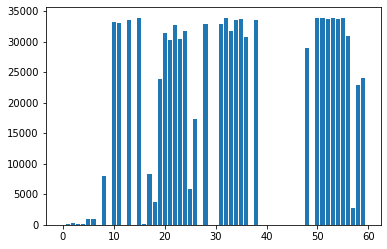

In [44]:
plt.bar(columns_id, columns_num_of_nan)
plt.show()

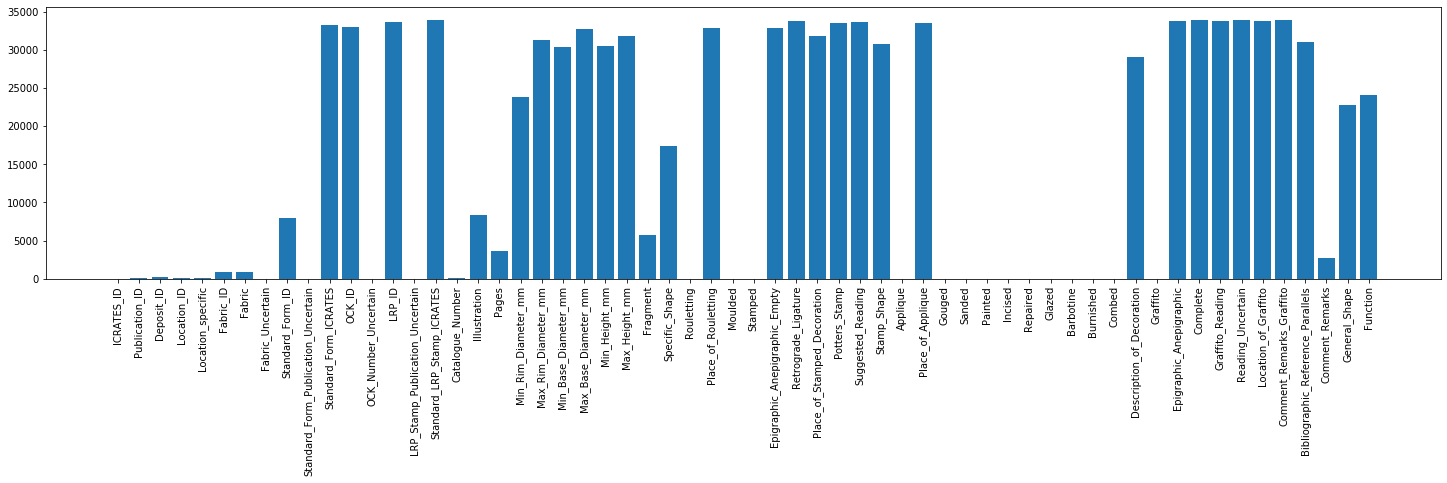

In [45]:
# ein bisschen schoener und aufschlussreicher:
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.bar(columns_id, columns_num_of_nan)
ax.set_xticks(columns_id)
ax.set_xticklabels(catalogue.columns, rotation=90, fontsize=10)
plt.show()

[Anfang](#top)

<a name="histogramme"></a>4. Histogramme
---
Im folgenden Abschnitt werden wir damit beginnen, die in den Daten enthaltenen Informationen zu visualisieren. Eine sehr einfache Visualisierung ist das Histogramm, eine graphische Darstellung der Häufigkeit eines Merkmals. Zur Illustration erstellen wir eine kleine Visualisierung der Verteilung von Werten in einer Liste:

In [46]:
# eine Liste mit 30 Ganzzahlen, die z.B. das Alter von Personen in einer
# Gruppe darstellen können
alter = [37, 20, 84,  2, 11, 89, 52, 65, 90, 21, 30, 12, 17, 53, 62, 45, 37,
        3,  6, 64, 85,  6, 95, 73, 68, 55, 86, 83, 91,  1]

# für Visualisierungen benutzen wir die Blbiothek "matplotlib.pyplot"
import matplotlib.pyplot as plt

# Histogramme lassen sich einfach mit der Funktion plt.hist() erstellen
plt.hist(alter);

Visualisierungen sollten immer mit Achsenbeschriftungen versehen werden. Dafür verwenden wir die Funktionen ```plt.xlabel()``` und ```plt.ylabel```. Außerdem können wir der Abbildung mit ```plt.title()``` einen Titel geben. Mit verschiedenen optionalen Argumenten lässt sich das Verhalten von ```plt.hist()``` anpassen:
* ```bins``` ändert die Anzahl der Bins
* ```range``` ändert den dargestellten Bereich auf der x-Achse
* ```rwidth``` ändert die dargestellte bin-Weite 
* ```color``` ändert die Farbe
* ```alpha``` ändert den Alpha-Wert (Durchsichtigkeit) der dargestellten Balken.

Plot-Funktionen haben oftmals sehr viele optionale Argumente (auch "keyword arguments" genannt). Um herauszufinden, wass die jeweiligen Funktionen alles können, lohnt sich ein Blick in die [Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Außerdem sollte jede Darstellung *immer* mit Achsenbeschriftungen und eventuell einem Titel versehen werden:

In [47]:
plt.hist(alter, color='red', rwidth=0.8, range=[0,100], bins=10, label='alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.legend()
plt.title('Verteilung des Alters');

[Anfang](#top)

### Aufgaben
**A.** Erstelle ein Histogramm der in der Spalte ```Min_Rim_Diameter_mm``` enthaltenen Durchmesser. <font color='green'>**HINWEIS:** Damit das funktioniert, musst du mit der Funktion ```dropna()``` alle ```NaN```-Werte entfernen.</font>  

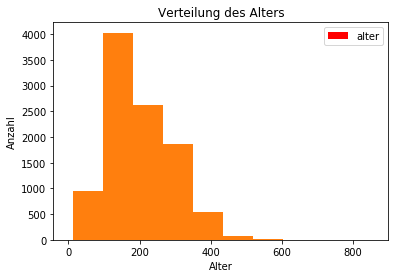

In [48]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna() )
plt.show()

**B.** Mache dich mit den unterschiedlichen Argumenten der Funktion ```plt.hist()``` vertraut, indem du verschiedene Werte und Kombinationen für die Daten ausprobierst. Finde Werte, die die Daten deiner Meinung nach gut und verständlich darstellen. Worauf kommt es dabei an? Versieh die Darstellung mit passenden Beschriftungen.  

In [49]:
plt.figure(figsize=(15,5))
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), color='darkred', rwidth=0.8, bins=25, label='ICRATES Catalogue')
plt.xlabel('Min_Rim_Diameter [mm]')
plt.ylabel('Counts')
plt.legend()
plt.title('Verteilung der Randdurchmesser');

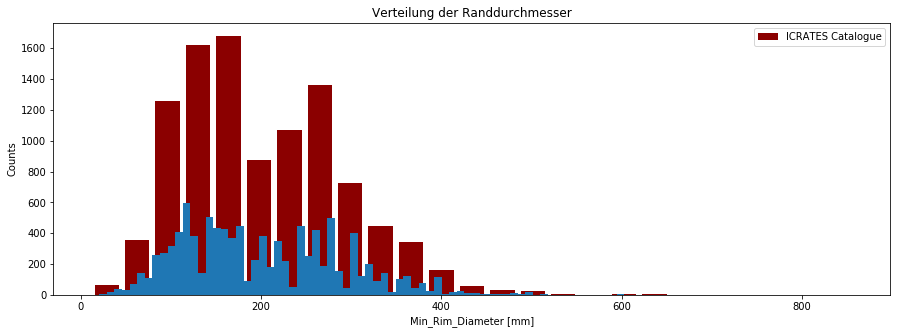

In [50]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), bins=100)
plt.show()

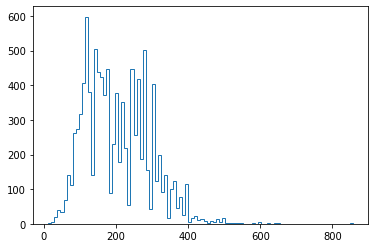

In [51]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), bins=100, histtype='step')
plt.show()

**C.** Insbesondere das Argument ```bins``` verändert die Darstellung des Histogrammes sehr stark. Was kann schiefgehen, wenn ```bins``` zu niedrig oder zu hoch gewählt wird? Was ist eine gute Wahl für einen (diesen) Datensatz?  

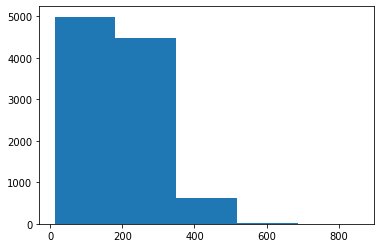

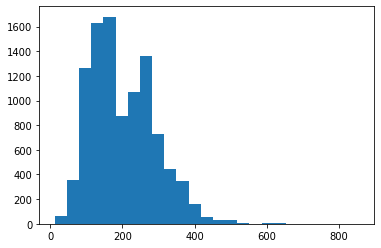

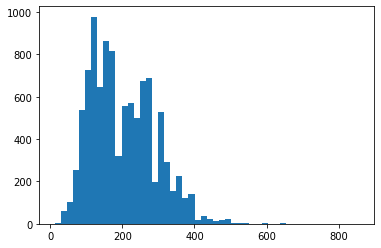

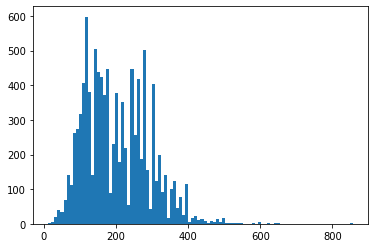

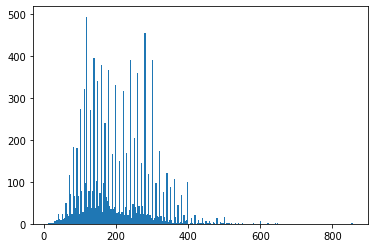

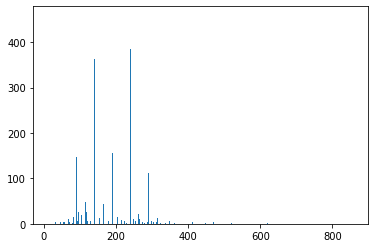

In [52]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), 5)
plt.show()

plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), 25)
plt.show()

plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), 50)
plt.show()

plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), 100)
plt.show()

plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), 250)
plt.show()

plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), 2500)
plt.show()

Wählen wir die bin - Anzahl zu klein, verlieren wir Informationen, weil wir zu viele unterschiedliche Informationen zusammen fassen. Bei zu großen Werten im Gegensatz zeigen wir mehr oder weniger die einzelnen Werte für die Durchmesser direkt an. Beides erlaubt uns nicht, einen Trend in den Daten zu finden.
Ein guter Wert, um einen Trend zu finden, ist hier zwischen 25 und 50, wir erkennen deutlich 2 Maxima in den Durchmessern.

**D.** Visualisiere die Durchmesser an der Gefäßbasis (```Min_Base_Diameter_mm```) im selben Histogram. Was für Aussagen über die Gefäße kannst du aus dieser Visualisierung ableiten? <font color='green'>**HINWEIS:** Du kannst einfach in der selben Code-Zelle zwei mal hintereinander die Funktion ```plt.hist()``` (natürlich mit unterschiedlichen Daten) aufrufen, um die Daten übereinandergelegt darzustellen. Du kannst mit der Funktion ```plt.legend()``` eine Legende zur Abbildung hinzufügen. Damit das funktioniert, musst du den einzelen plot-Befehlen vorher ein entsprechendes ```label``` Argument mitgeben.</font> Was fällt dir auf? Worauf musst du achten, damit die in beiden Histogrammen dargestellten Werte vergleichbar sind? Warum ist diese Darstellung eventuell irreführend?  

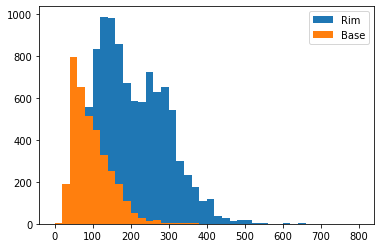

In [53]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), bins=40, range=[0,800], label='Rim')
plt.hist(catalogue.Min_Base_Diameter_mm.dropna(), bins=40, range=[0,800], label='Base')
plt.legend()
plt.show()

* Damit die beiden Histogramme vergleichbar sind, bietet es sich an, jeweils die gleiche Anzahl an bins und den gleichen Bereich (```range=[min,manx]```) abzubilden. 
* In dieser Darstellung sieht es so aus, als ob die Gefäße an der Basis im Schnitt deutlich kleiner sind als am oberen Rand. 
* In dem Datensatz gibt es wesentlich weniger Einträge zu Basis-Durchbessern als zu Durchmessern vom oberen Rand. Das darsgestellte Ergebnis könnte als zum einen daran liegen, dass die Gefäße an der Basis tatsächlich kleiner sind. Eine alternative Erklärung wäre, dass eher Stücke von kleinen Gefäßen, aus denen sich der Basis-Durchmesser errechnen lässt, erhalten sind.

**E. (Optional)** Was hat es mit den beiden keyword arguments ```density``` und ```cumulative``` auf sich? Wie verändert sich das Histogram und wie kann die Darstellung dann interpretiert werden?

Die Dokumentation (```Shift + Tab```) zeigt uns folgendes:

**density**:
_the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1_
    
**cumulative**:
_each bin gives the counts in that bin plus all bins for smaller values. The last bin gives the total number of datapoints_



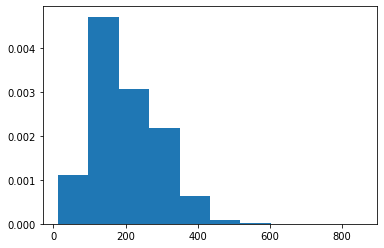

In [54]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), density=True)
plt.show()

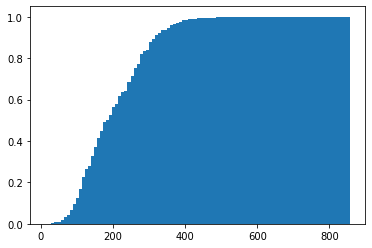

In [55]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), density=True, bins=100, cumulative=True)
plt.show()

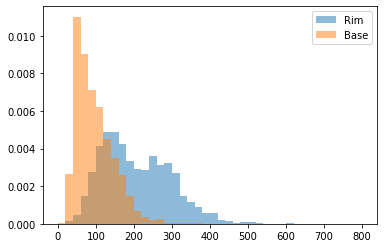

In [56]:
plt.hist(catalogue.Min_Rim_Diameter_mm.dropna(), bins=40, range=[0,800], alpha=.5, density=True, label='Rim')
plt.hist(catalogue.Min_Base_Diameter_mm.dropna(), bins=40, range=[0,800], alpha=.5, density=True, label='Base')
plt.legend()
plt.show()

[Anfang](#top)